# 0. Imports

In [1]:
import pandas as pd
import numpy as np
import requests as rq
import bs4
import lxml
import os
import time
from dateutil import parser

# 1. Data collection

## 1.1 Get the list of places

In [23]:
home_url = "https://www.atlasobscura.com"
page_url = "https://www.atlasobscura.com/places?sort=likes_count"
initial_result = rq.get(page_url)

In [8]:
# top_places = []
N = 400-len(top_places)

In [9]:
for _ in range(N):
    
    if _ % 50 == 0:
        print(page_url)
    
    time.sleep(0.01)
    result = rq.get(page_url)
    soup = bs4.BeautifulSoup(result.text)
    
    cards = soup.find_all("div", {"class": "col-md-4 col-sm-6 col-xs-12"})
    page_urls = [card.find_all("a", {"class": "content-card content-card-place"})[0].get('href') 
                 for card in cards]
    
    top_places.append(page_urls)
    
    next_page = soup.find_all("a", {"rel": "next"})[0].get('href')
    page_url = home_url + next_page
    

https://www.atlasobscura.com/places?page=219&sort=likes_count
https://www.atlasobscura.com/places?page=269&sort=likes_count
https://www.atlasobscura.com/places?page=319&sort=likes_count
https://www.atlasobscura.com/places?page=369&sort=likes_count


In [17]:
len(top_places)

[['/places/cemetery-danvers-hospital-criminally-insane',
  '/places/royal-botanic-gardens-edinburgh',
  '/places/forestiere-underground-gardens',
  '/places/muriels-ghost-at-jackson-square',
  '/places/grotto-at-grand-canyon-caverns',
  '/places/lalaurie-mansion',
  '/places/exploratorium',
  '/places/hvitserkur',
  '/places/spectre-set-ruins',
  '/places/flourescent-rocks-of-sterling-hill-mine',
  '/places/orfield-labs-quiet-chamber',
  '/places/growing-underground',
  '/places/the-monkey-s-paw-toronto-ontario',
  '/places/ruby-falls-1',
  '/places/madonna-inn',
  '/places/temple-church',
  '/places/temple-of-mithras',
  '/places/tiffany-glass-mural-the-dream-garden'],
 ['/places/wellcome-collection-library',
  '/places/dome-illusion',
  '/places/voodoo-doughnut-and-wedding-chapel',
  '/places/museum-vrolik',
  '/places/venice-of-america-canals',
  '/places/weeki-wachee-city-live-mermaids',
  '/places/un-regard-moderne-bookstore',
  '/places/nunhead-cemetery',
  '/places/porta-magica'

In [26]:
with open("/home/enno/Documents/GitHub/G32HW3/htmls/places.txt", 'w+') as f:
    for page in top_places:
        for place in page:
            f.write(home_url + place + '\n')

## 1.2 Crawl places

In [ ]:
with open("/home/enno/Documents/GitHub/G32HW3/htmls/places.txt", 'r+') as f:
    top_places = np.array_split(f.readlines(), 400)

"\n# for reading the files with bs4\nwith open('path/to/saving.html', 'rb') as f:\n    soup = BeautifulSoup(f.read(), 'lxml')\n    "

In [37]:
def crawl_places(urls_per_page,
                 parent_dir="/home/enno/Documents/GitHub/G32HW3/htmls",
                 page_ix=1):
    
    # parameter parent_dir has to be set according to user specs
    
    directory = f'page_{page_ix}'
    path = os.path.join(parent_dir, directory)
    os.mkdir(path)

    for place_ref in urls_per_page:
        place_ref = place_ref[:-1]
        print(place_ref)
        
        time.sleep(5)
        page = rq.get(place_ref)
        place_name = place_ref.split('/')[-1].replace('-', '_')
        
        print(place_name)

        with open(f'{path}/{place_name}.html', 'wb+') as f:
            f.write(page.content)


In [ ]:
for ix, page in enumerate(top_places[276:], start=273):
    if ix % 25 == 0: print('Page', ix)
    crawl_places(page, page_ix=ix)

https://www.atlasobscura.com/places/admirals-row
admirals_row
https://www.atlasobscura.com/places/contrabando
contrabando
https://www.atlasobscura.com/places/czechs-capuchin-crypt
czechs_capuchin_crypt
https://www.atlasobscura.com/places/philbert-the-pig
philbert_the_pig
https://www.atlasobscura.com/places/belle-of-louisville
belle_of_louisville
https://www.atlasobscura.com/places/cs-lewis-grave
cs_lewis_grave
https://www.atlasobscura.com/places/the-rue-obscure-villefranche-sur-mer-france
the_rue_obscure_villefranche_sur_mer_france
https://www.atlasobscura.com/places/neon-vancouver-ugly-vancouver
neon_vancouver_ugly_vancouver
https://www.atlasobscura.com/places/elvis-karate-fight-plaque
elvis_karate_fight_plaque
https://www.atlasobscura.com/places/municipal-house
municipal_house
https://www.atlasobscura.com/places/the-lucifer-of-liege-liege-belgium
the_lucifer_of_liege_liege_belgium
https://www.atlasobscura.com/places/patsy-clines-childhood-home-and-grave
patsy_clines_childhood_home_an

snosatra_wall_of_fame
https://www.atlasobscura.com/places/abandoned-haludovo-palace-hotel
abandoned_haludovo_palace_hotel
https://www.atlasobscura.com/places/donauquelle
donauquelle
https://www.atlasobscura.com/places/dude-chilling-park
dude_chilling_park
https://www.atlasobscura.com/places/conor-byrne-pub
conor_byrne_pub
https://www.atlasobscura.com/places/friends-quaker-cemetery
friends_quaker_cemetery
https://www.atlasobscura.com/places/wunderkammer
wunderkammer
https://www.atlasobscura.com/places/old-spanish-sugar-mill
old_spanish_sugar_mill
https://www.atlasobscura.com/places/edinburgh-book-sculptures
edinburgh_book_sculptures
https://www.atlasobscura.com/places/trollskogen-troll-forest
trollskogen_troll_forest
https://www.atlasobscura.com/places/oswalds-bear-ranch
oswalds_bear_ranch
https://www.atlasobscura.com/places/agnete-and-the-merman
agnete_and_the_merman
https://www.atlasobscura.com/places/temppeliaukio-church
temppeliaukio_church
https://www.atlasobscura.com/places/histor

holodomor_memorial
https://www.atlasobscura.com/places/tintic-standard-reduction-mill
tintic_standard_reduction_mill
https://www.atlasobscura.com/places/tubakuba
tubakuba
https://www.atlasobscura.com/places/castleboro-house
castleboro_house
https://www.atlasobscura.com/places/the-roald-dahl-museum-great-missenden-england
the_roald_dahl_museum_great_missenden_england
https://www.atlasobscura.com/places/llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch
llanfairpwllgwyngyllgogerychwyrndrobwllllantysiliogogogoch
https://www.atlasobscura.com/places/the-garfield-clarendon-model-railroad-club-chicago-illinois
the_garfield_clarendon_model_railroad_club_chicago_illinois
https://www.atlasobscura.com/places/birthplace-of-f-scott-fitzgerald
birthplace_of_f_scott_fitzgerald
https://www.atlasobscura.com/places/s-s-selma
s_s_selma
https://www.atlasobscura.com/places/armour-meatpacking-plant
armour_meatpacking_plant
https://www.atlasobscura.com/places/forty-one-cooper-square
forty_one_cooper_

ireland_park
https://www.atlasobscura.com/places/great-polish-map-of-scotland
great_polish_map_of_scotland
https://www.atlasobscura.com/places/green-vault
green_vault
https://www.atlasobscura.com/places/elmwood-cemetery
elmwood_cemetery
https://www.atlasobscura.com/places/i-fought-the-law-and-the-precinct-caved-in
i_fought_the_law_and_the_precinct_caved_in
https://www.atlasobscura.com/places/fort-wetherill
fort_wetherill
https://www.atlasobscura.com/places/setenil-de-las-bodegas
setenil_de_las_bodegas
https://www.atlasobscura.com/places/howe-caverns
howe_caverns
https://www.atlasobscura.com/places/ospedale-degli-innocenti-hospice-innocent
ospedale_degli_innocenti_hospice_innocent
https://www.atlasobscura.com/places/white-mana-diner
white_mana_diner
https://www.atlasobscura.com/places/high-point-restaurant
high_point_restaurant
https://www.atlasobscura.com/places/museum-of-prophecies
museum_of_prophecies
https://www.atlasobscura.com/places/los-cerrillos
los_cerrillos
https://www.atlasob

consonno
https://www.atlasobscura.com/places/the-frenchman-s-tower-palo-alto-california
the_frenchman_s_tower_palo_alto_california
https://www.atlasobscura.com/places/brasstown-bald
brasstown_bald
https://www.atlasobscura.com/places/buffalo-ridge-1880-cowboy-town
buffalo_ridge_1880_cowboy_town
https://www.atlasobscura.com/places/legs-inn-michigan-lake
legs_inn_michigan_lake
https://www.atlasobscura.com/places/takara-sake-museum
takara_sake_museum
https://www.atlasobscura.com/places/the-fantastic-umbrella-factory-charlestown-rhode-island
the_fantastic_umbrella_factory_charlestown_rhode_island
https://www.atlasobscura.com/places/sliabh-foy-loop-trail
sliabh_foy_loop_trail
https://www.atlasobscura.com/places/the-hand
the_hand
https://www.atlasobscura.com/places/alfred-hitchcocks-london-flat
alfred_hitchcocks_london_flat
https://www.atlasobscura.com/places/black-cats-of-carreras-cigarette-factory
black_cats_of_carreras_cigarette_factory
https://www.atlasobscura.com/places/wrong-store
wrong

In [19]:
## 1.3  Parse downloaded pages

[<a href="/places?page=3&amp;sort=likes_count" rel="next">3</a>,
 <a href="/places?page=3&amp;sort=likes_count" rel="next">Next</a>]

In [ ]:
# for reading the files with bs4
with open('/Users/giosc/OneDrive/Desktop/ADM/Homework_3/hw3_htmls/page_1/catacombes_de_paris.html', 'rb') as f:
    soup = bs4.BeautifulSoup(f.read(), 'lxml')

In [ ]:
directory = '/Users/giosc/OneDrive/Desktop/ADM/Homework_3/hw3_htmls/page_1'
for filename in os.scandir(directory):
    if filename.is_file():
        with open(filename, 'rb') as f:
            soup = bs4.BeautifulSoup(f.read(), 'lxml') 

## 7. Theoretical question

An imaginary university is interested in accepting some of the applicants for positions to study the Master of Data Science there. Unfortunately, only a few spots are available, so the university requires students to take some exams. Students are then admitted based on how well they perform on these exams. For students to determine whether they have been successfully accepted to the university, the university wants to create a ranking list that includes every student's first name, last name, and total average on its course webpage. Students should be ranked in the list based on their average points in descending order. For example, if two students have the same average punctuation, they should be sorted in ascending order using their first and last names. University will give you the students' information in 'ApplicantsInfo.txt', and you should provide them with the ranking list in another .txt file and name it as 'RankingList.txt' . Kindly help this university in preparing this ranking list.


   1 Try solving the problem mentioned above using three different sorting algorithms (do not use any MapReduce algorithm). (Note: Built-in Python functions (like .mean, .sort, etc.) are not allowed to be used. You must implement the algorithms from scratch).
   
   2 What is the time complexity of each algorithm you have used?
   
   3 Evaluate the time taken for each of your implementations to answer the query stored in the ApplicantsInfo.txt file and visualize them.
   
   4 What is the most optimal algorithm, in your opinion, and why?
   
   5 Implement a sorting algorithm using MapReduce and compare it against the three algorithms previously implemented using the ApplicantsInfo.txt file.


In [1]:
n=10000 #number of students  
m=50 #number of exams
f=open('ApplicantsInfo.txt','r')
i=0
Applic={} #we want to create a dict of students
for line in f:
    line=line.split()
    if i==0: #skipping the first line because is the shape of the file
        i=1
    else:
        if n!=0:
            student=line[0]+' '+line[1]
            Applic[student]=[int(x) for x in line[2:m+2]]
            n-=1
f.close()

In [2]:
#Implementing an average function
def Average(x):
    aver=0
    for i in x:
        aver+=i
    
    return round(aver/len(x),2)

The running time of Average is $\Theta(N)$ where N is the length of the input x

In [3]:
#Creating a list of lists with the averages for each student
Rank=[]
for name in [stud for stud in Applic.keys()]: 
    Rank.append([name,Average(Applic[name])])

In [4]:
#Sorting algorithms for list of list
#if h=1 it sorts by scores, if h=0 it sorts by names
def InsertionSort(Rank,h): 
    
    for i in range(1,len(Rank)):
            temp= Rank[i]
            j=i-1
            while j>=0 and temp[h]>Rank[j][h]:
                     Rank[j+1] = Rank[j]
                     j-=1  
            Rank[j+1] = temp
    return Rank
############################################
def SelectionSort(Rank, h):
    
    for i in range(len(Rank)):
        M = i
        for j in range(i + 1,len(Rank)):
            if Rank[j][h] > Rank[M][h]:
                M = j
        (Rank[i], Rank[M]) = (Rank[M], Rank[i])
        
    return Rank
#############################################
def BubbleSort(Rank,h):
    change = 0
    for i in range(len(Rank)-1):
        for j in range(0, len(Rank)-i-1):
            if Rank[j][h] < Rank[j+1][h]:
                change = 1
                (Rank[j], Rank[j+1]) = (Rank[j+1], Rank[j])
        if change==0:
            return Rank
    return Rank

All of those algorithms have running time of $\Theta(N^2)$ where N is the length of the array in input

In [5]:
#Sorting the Applicants
import timeit 
unsorted=Rank.copy() #we want to keep the unsorted list to compare this non MapReduced algorithm with the MapReduced one
Times=[]
for Alg in [1,2,3]: # 1: InsertionSort, 2: SelectionSort, 3:BubbleSort
    Rank=unsorted.copy()
    start=timeit.default_timer() #this is to evaluate the time required to run the algorithm
    #sorting by exams averages
    if Alg==1:
        Rank=InsertionSort(Rank,1)
    elif Alg==2:
        Rank=SelectionSort(Rank,1)
    elif Alg==3:
        Rank=BubbleSort(Rank,1)
        
    #sorting duplicates by names
    i=0 
    while i <= (len(Rank)-1):
        j=1
        while (i+j)<(len(Rank)-1) and Rank[i][1]==Rank[i+j][1]: #to know the length of consecutive elements that have same score
            j+=1
        if j!=1: 
            #temp variable to store the correct order (we used [::-1] to sort in ascending order)
            if Alg==1:
                temp=InsertionSort([Rank[i+k] for k in range(j)],0)[::-1] 
            elif Alg==2:
                temp=SelectionSort([Rank[i+k] for k in range(j)],0)[::-1]
            if Alg==3:
                temp=BubbleSort([Rank[i+k] for k in range(j)],0)[::-1]
            for k in range(j):
                Rank[i+k]=temp[k] #changing the order in the Rank
            i+=j #just to skip the elements already changed
        else:
            i+=1

    stop=timeit.default_timer()
    Times.append(stop-start)


The running time to sort the duplicate is, in the worst case (i.e. all the scores are the same), equal to the running time of the sort method we use to sort by names so it is $\Theta(N^2)$.

So we have that to sort the Rank vector, in the worst case, we need a running time of $\Theta(2N^2)$

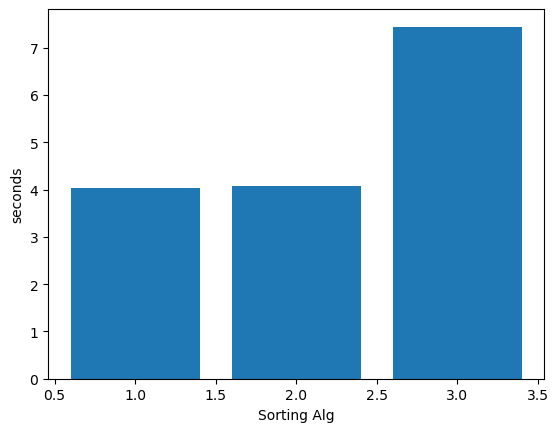

[4.035674, 4.079953, 7.444565399999998]

In [6]:
#Plotting the running times of each algorithm
import matplotlib.pyplot as plt
plt.ylabel('seconds')
plt.xlabel('Sorting Alg')
plt.bar([1,2,3],Times)
plt.show()
Times

As we can see, the InsertionSort algorithm is the best one of the non MapReduced algorithms

In [7]:
#implementing a MapReduced algorithm to confront the running times

def MergeSort(Rank,h):
    
    if len(Rank) == 1:
        return Rank

    l = len(Rank) // 2
    left = MergeSort(Rank[:l],h)
    right = MergeSort(Rank[l:],h)
    return merge(left, right,h)
#####################################
def merge(left, right,h):
    merged = []
    i = 0 
    j=0
    
    while i < len(left) and j < len(right):
        if left[i][h] > right[j][h]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

In [8]:
Rank=unsorted #because the Rank list was already sorted by previous codes so I'll assign back the unsorted one
start=timeit.default_timer()
#sorting Rank by scores
Rank=MergeSort(Rank,1)
#sorting duplicates by names (Reusing previous algorithm)
i=0 
while i <= (len(Rank)-1):
        j=1
        while (i+j)<(len(Rank)-1) and Rank[i][1]==Rank[i+j][1]: #to know the length of consecutive elements that have same score
            j+=1
        if j!=1: 
            #temp variable to store the correct order (we used [::-1] to sort in ascending order)
            temp=MergeSort([Rank[i+k] for k in range(j)],0)[::-1] 
           
            for k in range(j):
                Rank[i+k]=temp[k] #changing the order in the Rank
            i+=j #just to skip the elements already changed
        else:
            i+=1
stop=timeit.default_timer()
Times.append(stop-start)

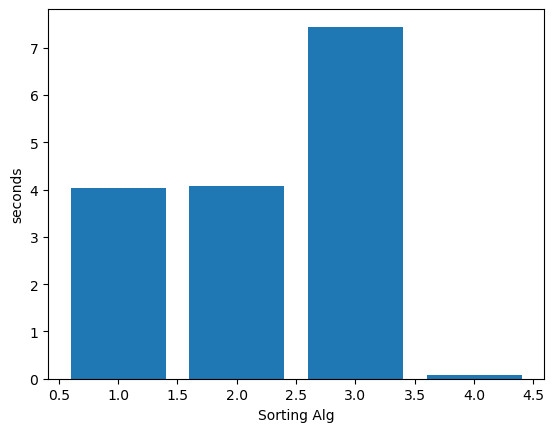

[4.035674, 4.079953, 7.444565399999998, 0.06906580000000417]

In [9]:
#Plotting the running times
plt.ylabel('seconds')
plt.xlabel('Sorting Alg')
plt.bar([1,2,3,4],Times)
plt.show()
Times

In [10]:
#TOP TEN STUDENTS
assert len(Rank)>=10

for i in range(10):
    print(Rank[i][0]+' '+str(Rank[i][1]))
    


Michael Hunley 26.02
Robert Seelbach 25.94
Felicia Payne 25.88
Karen Viard 25.88
Nakia Loza 25.82
Walter Jones 25.76
Jasmine Harrell 25.72
Mary Perrella 25.66
Stanley Hartrick 25.64
Samuel Winfrey 25.6


In [11]:
F=open('RankingList.txt','w') #creating a .txt file with the sorted Applicants
for i in range(len(Rank)):
    F.write(Rank[i][0]+' '+str(Rank[i][1])+'\n')
F.close()